In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

In [5]:
df=pd.read_csv('/content/drive/MyDrive/cancer patient data sets.csv',index_col='index')
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [21]:
print('\n')
#df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

df.head()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [22]:
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [24]:
print('Cancer Levels: ', df['level'].unique())
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

print('\nColumns in dataframe: \n', df.columns)
print('\n')

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')




In [25]:
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


In [26]:
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

In [28]:
# Consolidating Necessary Columns

cols = [
    'age', 'weight_loss', 'smoking'
]

cols2 = [ 'gender']

cols3 = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue'
]

*************************************************************************************************************************


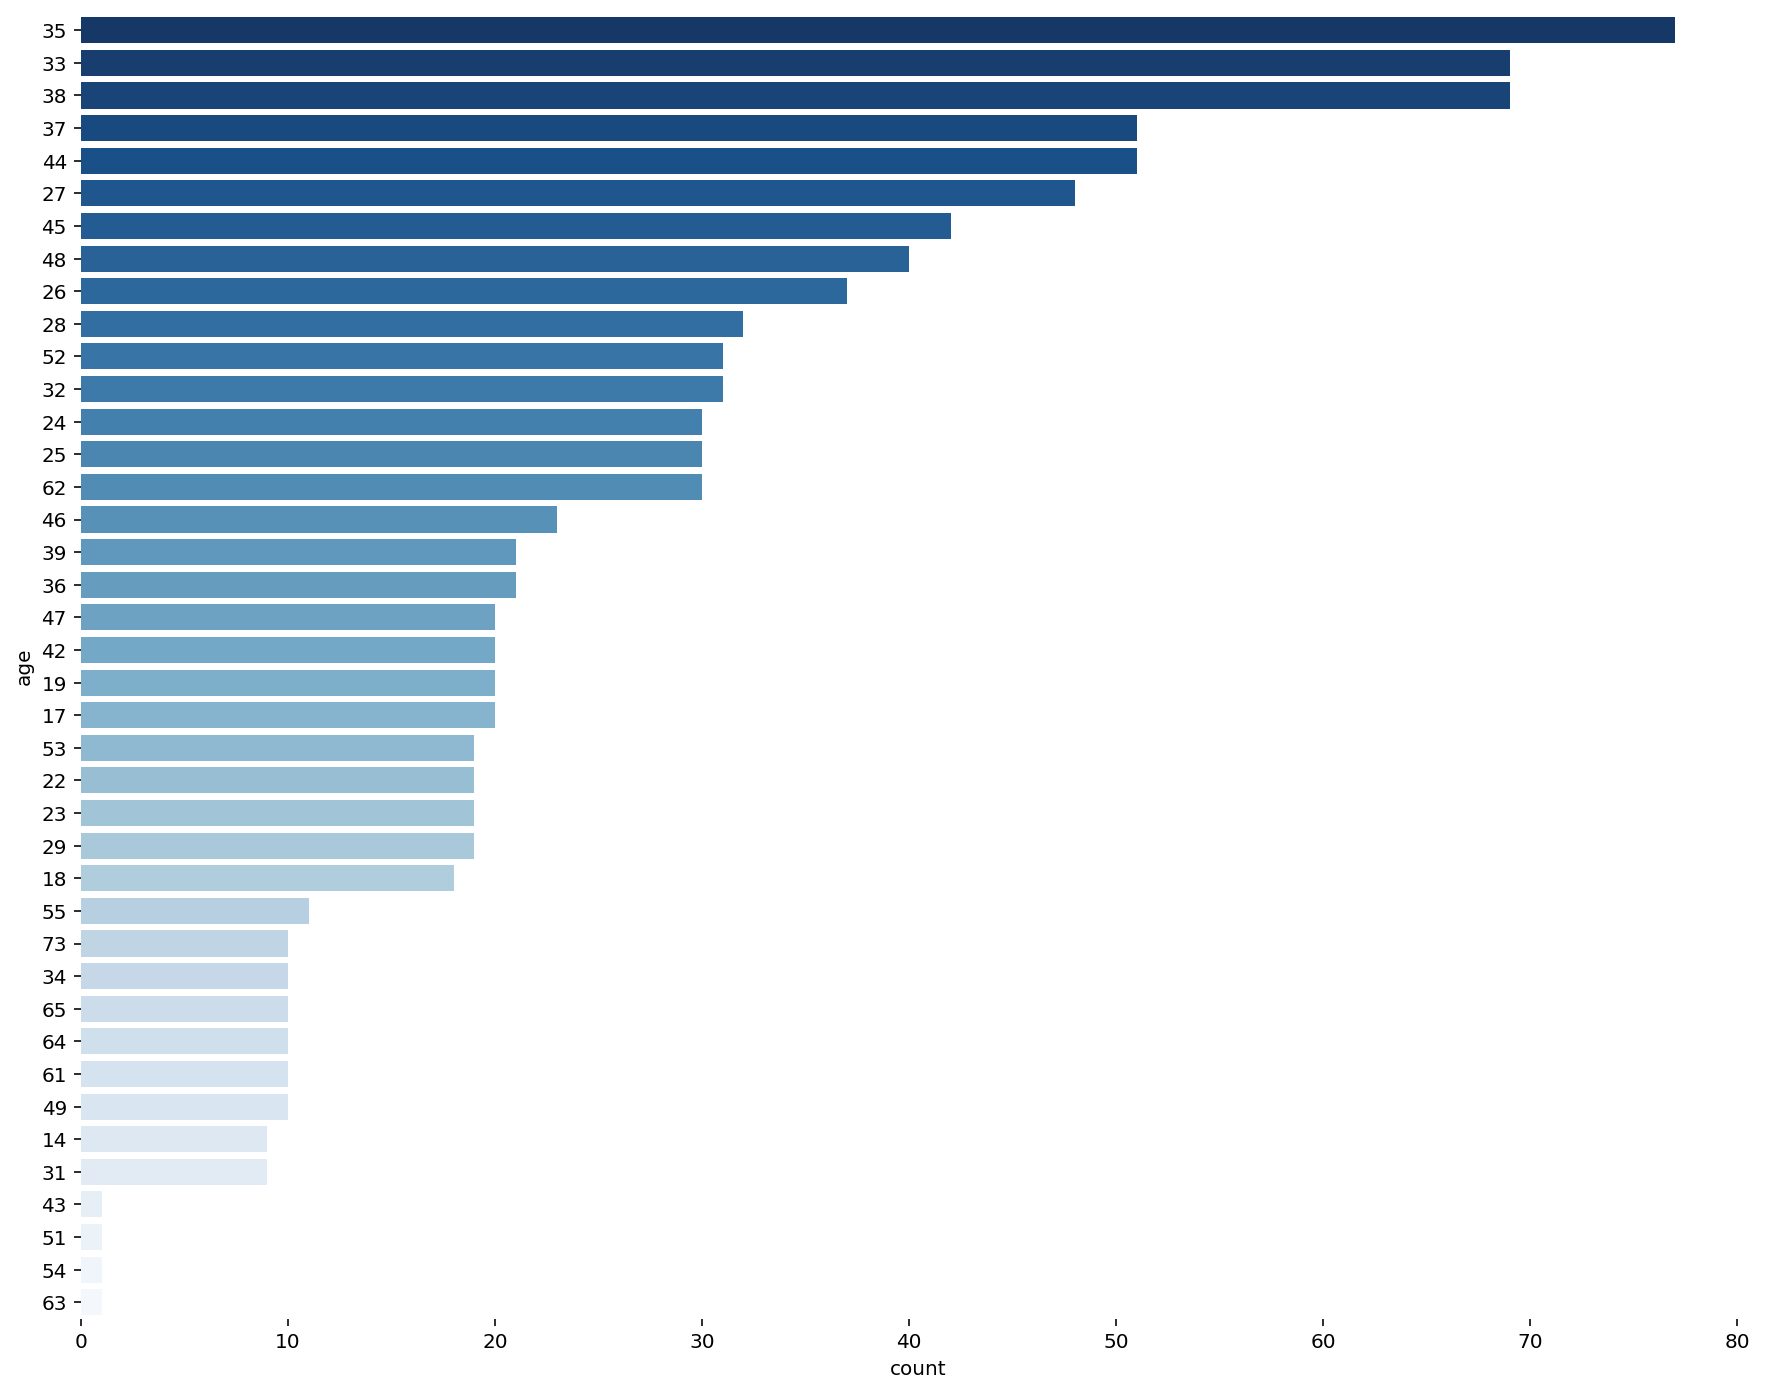

*************************************************************************************************************************


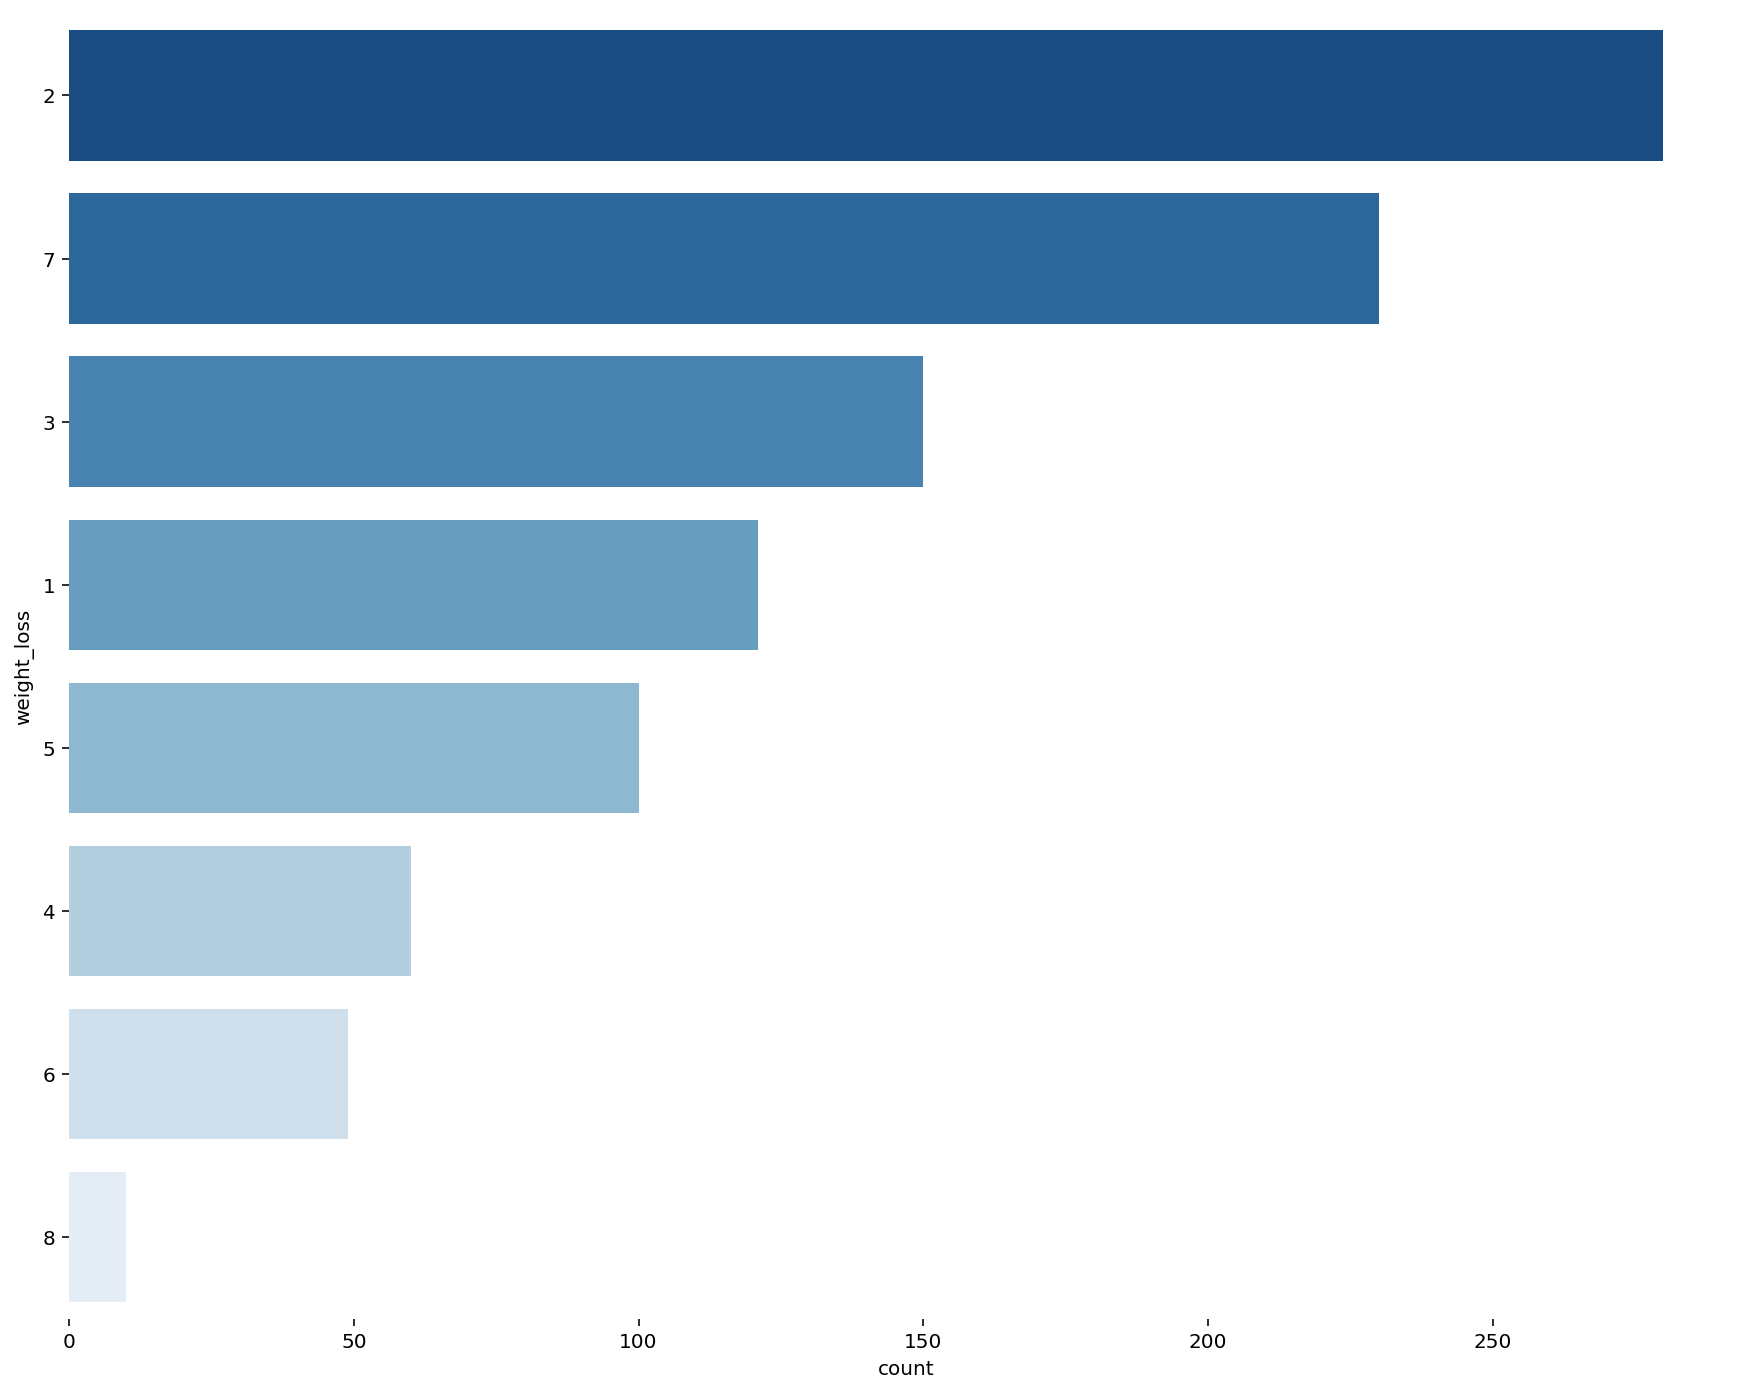

*************************************************************************************************************************


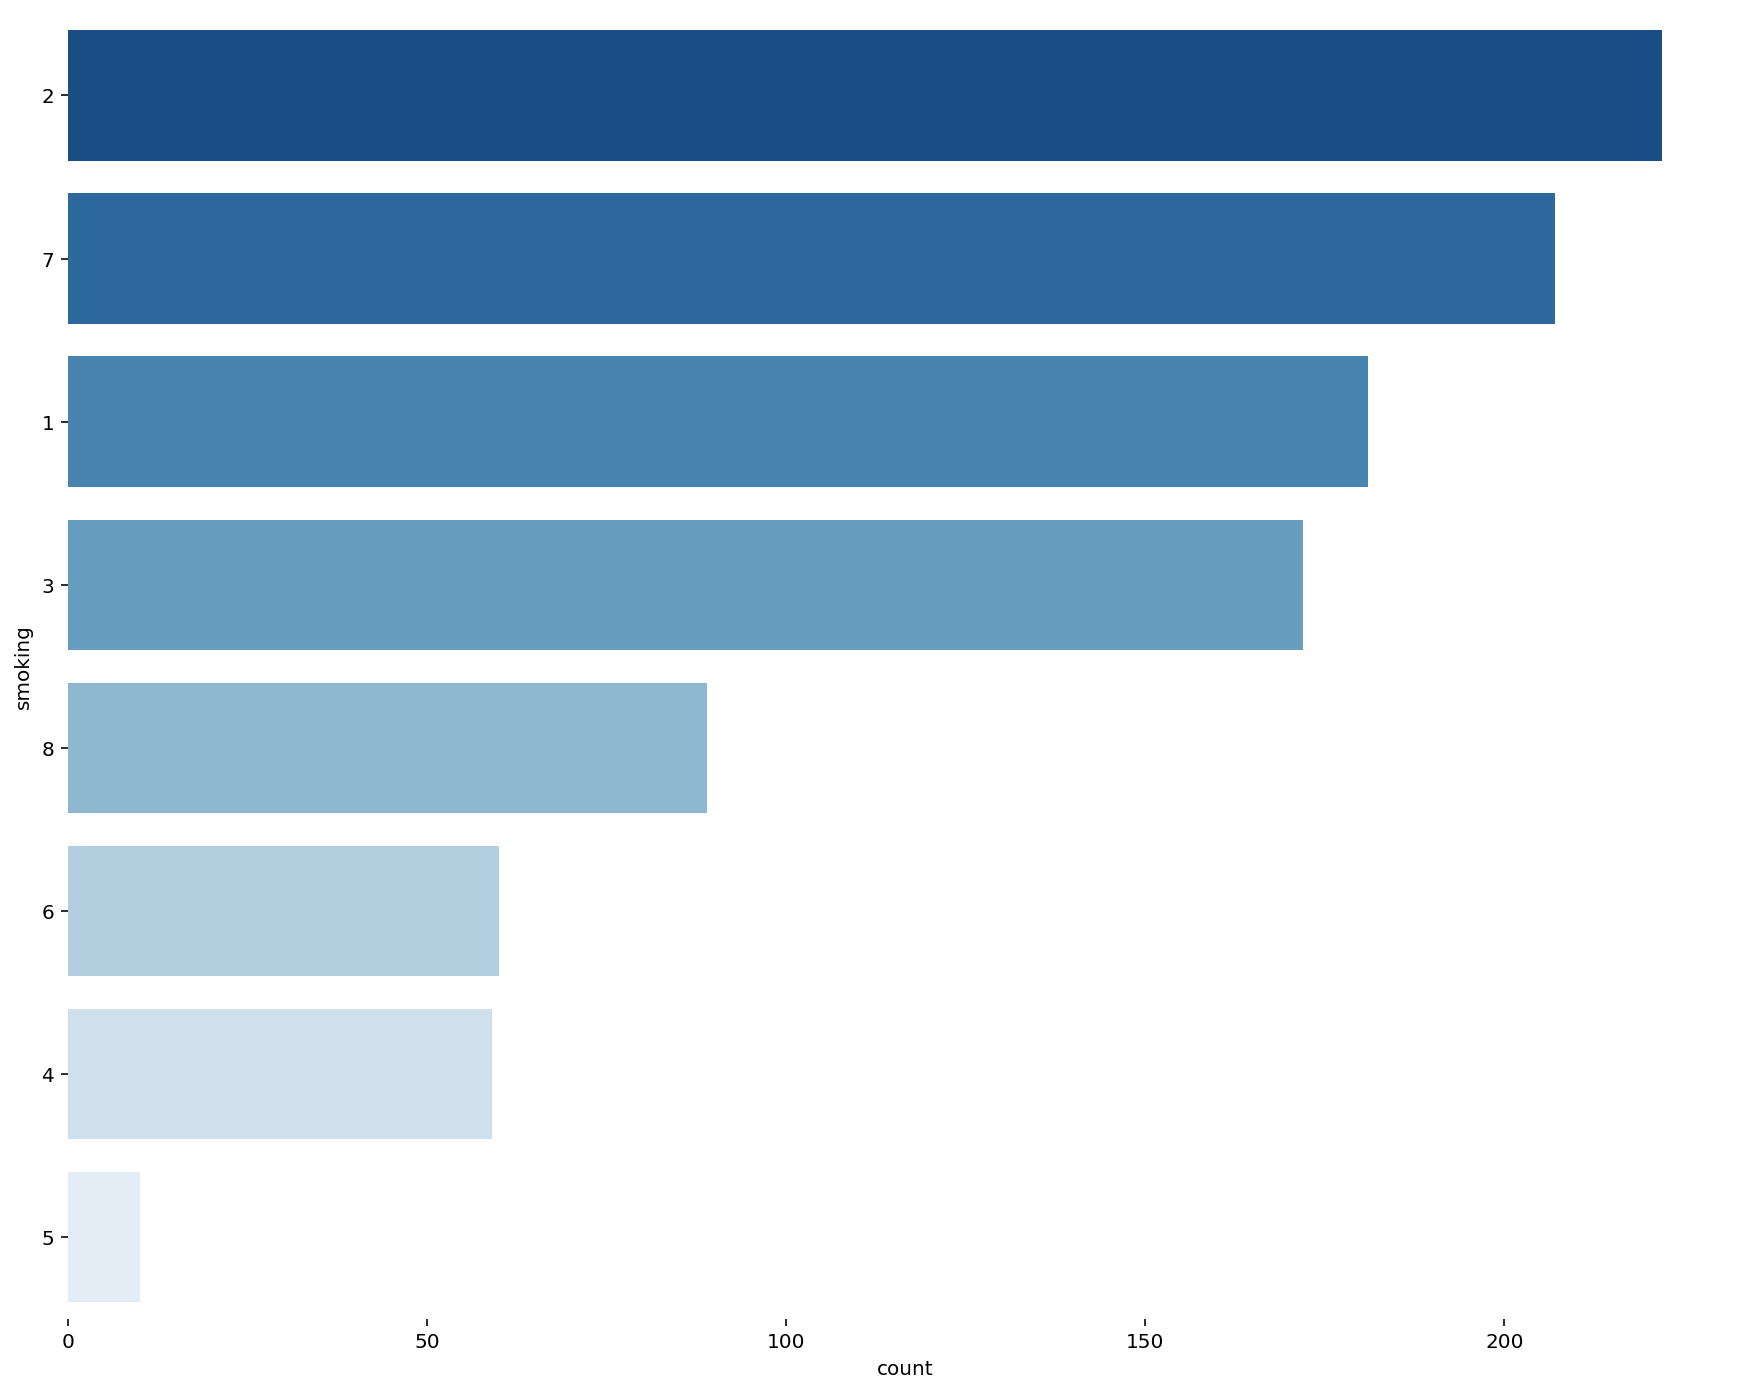

**********************************************************************************************************************


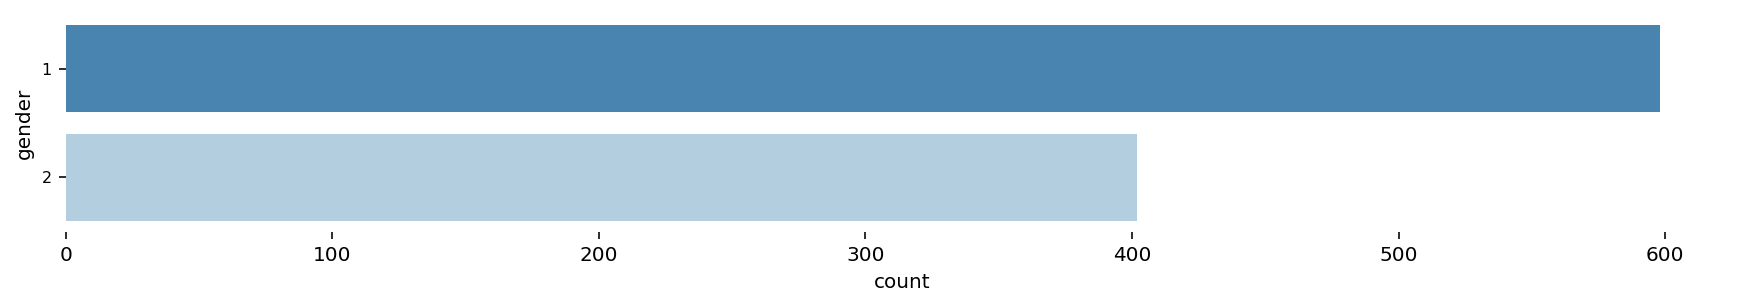

In [29]:
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  print("*************************************************************************************************************************")
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    print("**********************************************************************************************************************")
    plt.box(False)
    plt.show()

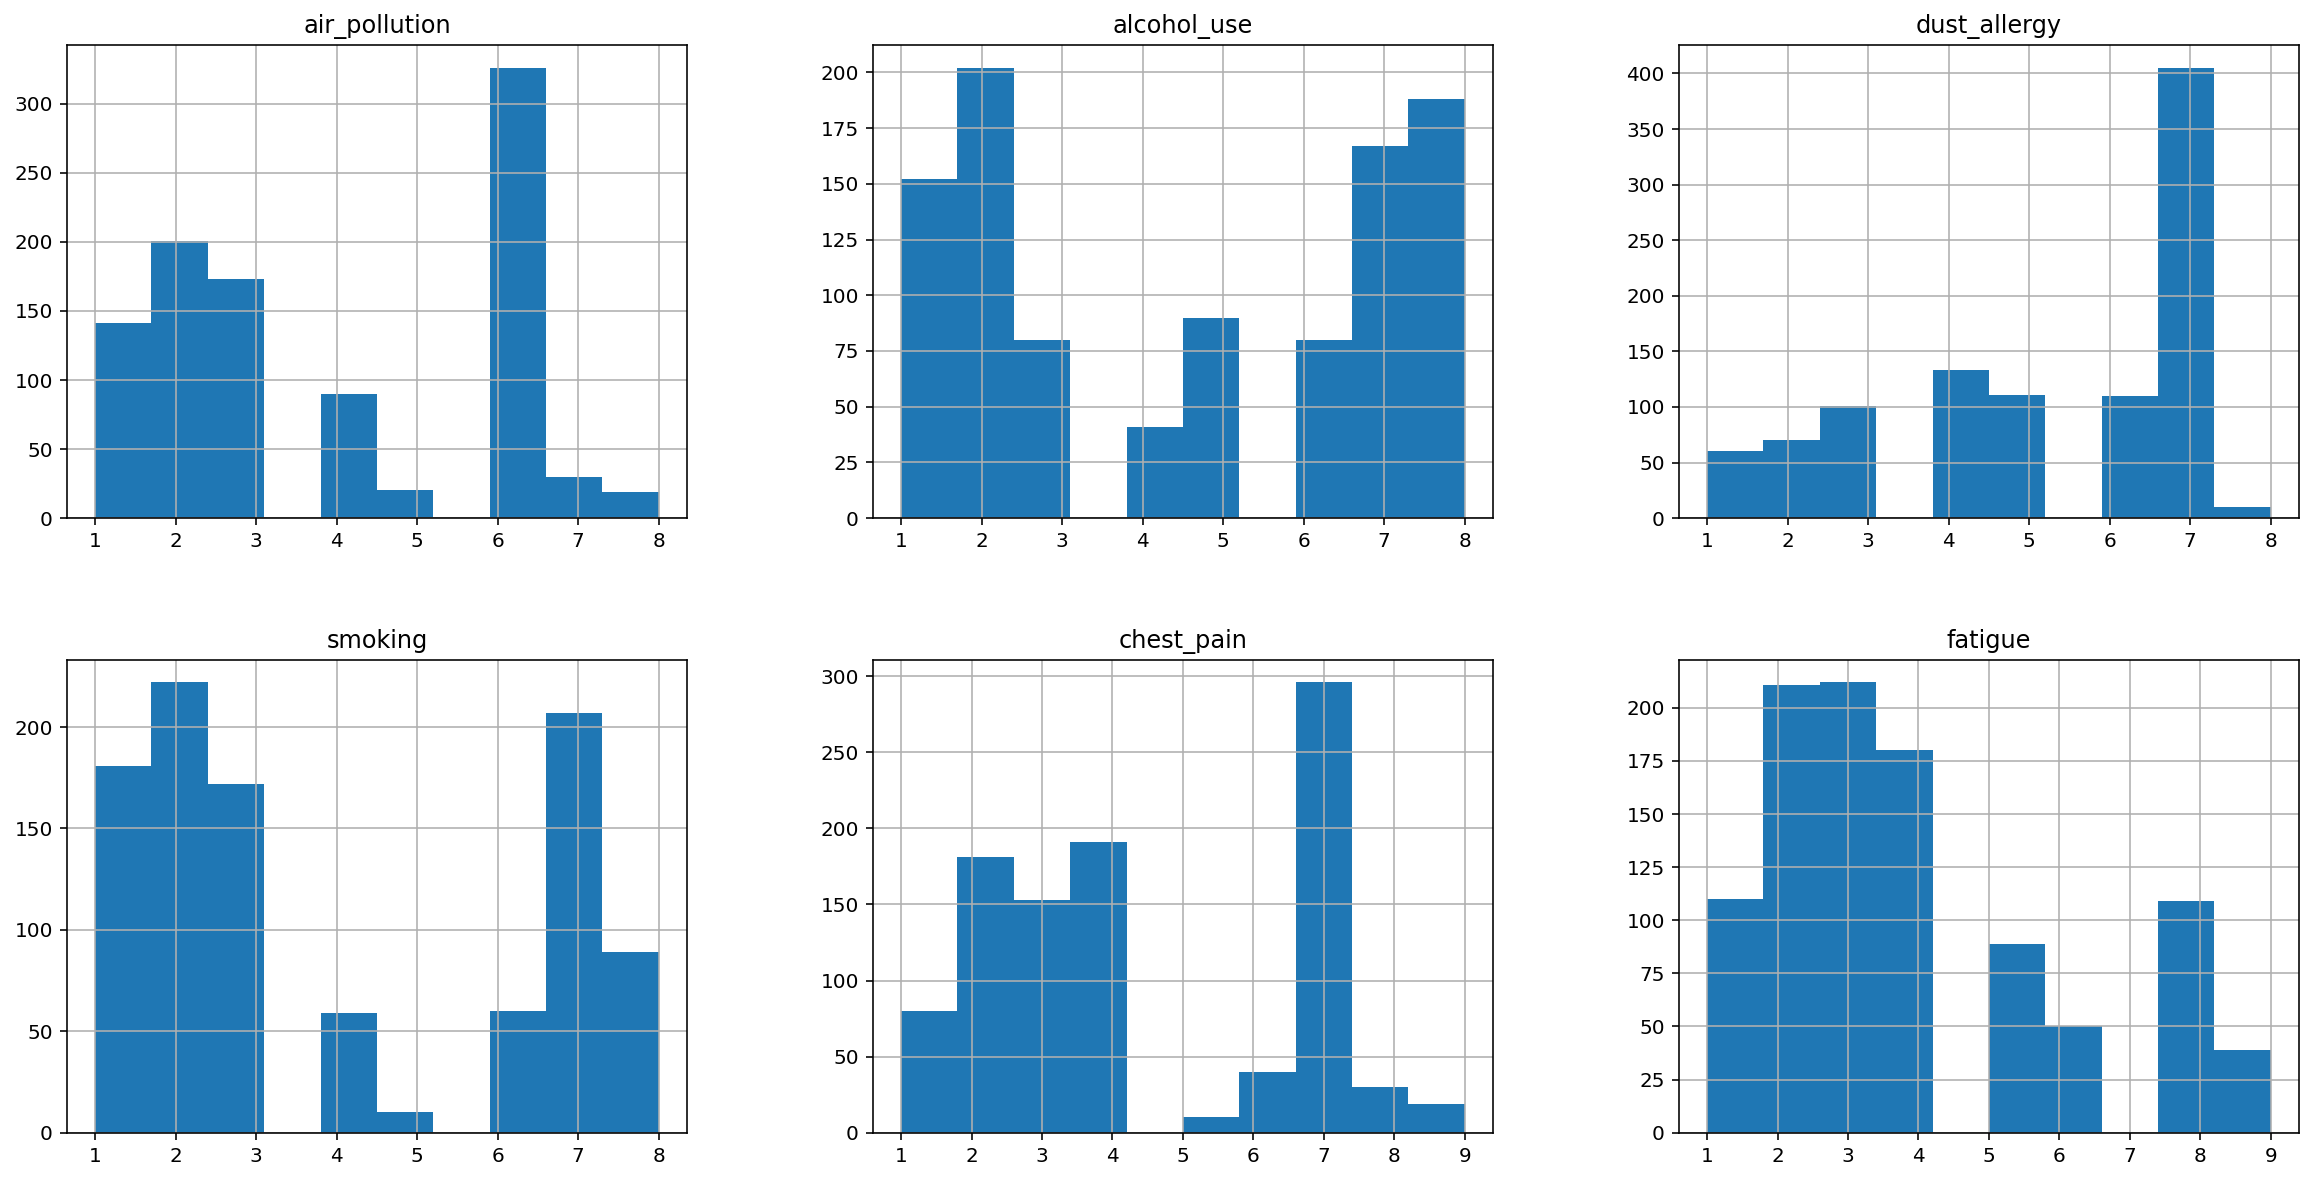

In [30]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()

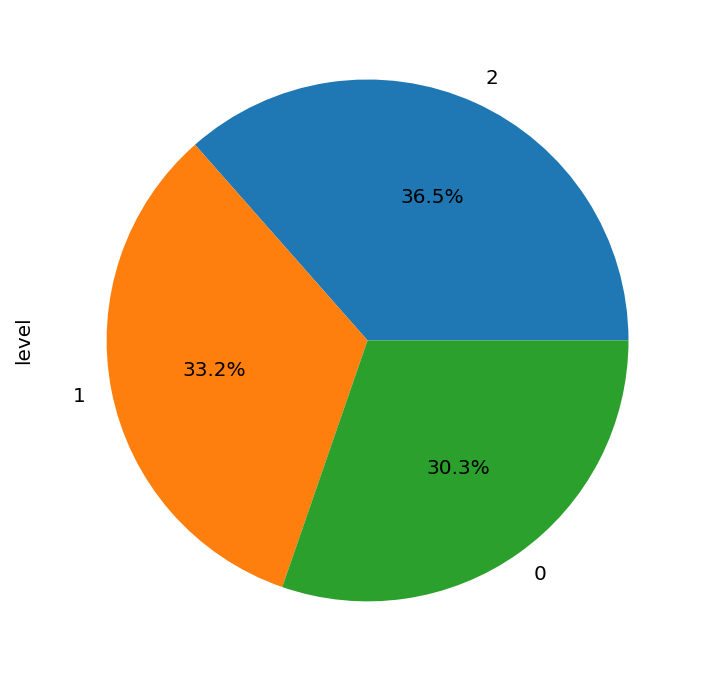

In [31]:
df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()


	Smoking and Label of Lung Cancer


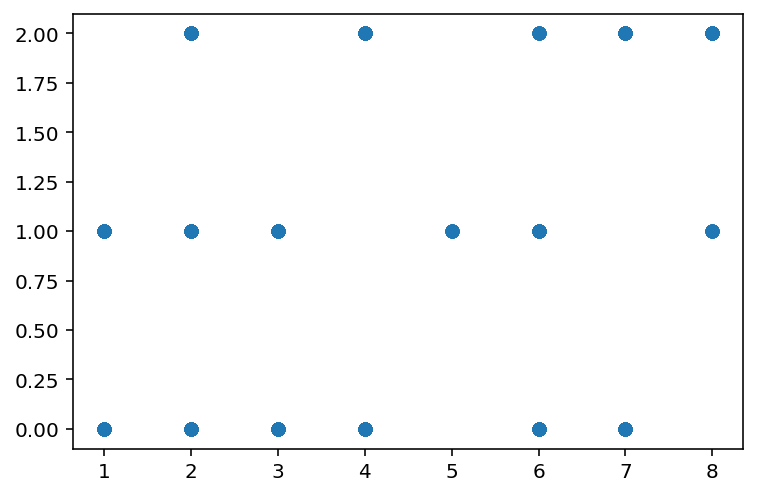




	Air Polution and Label of Lung Cancer


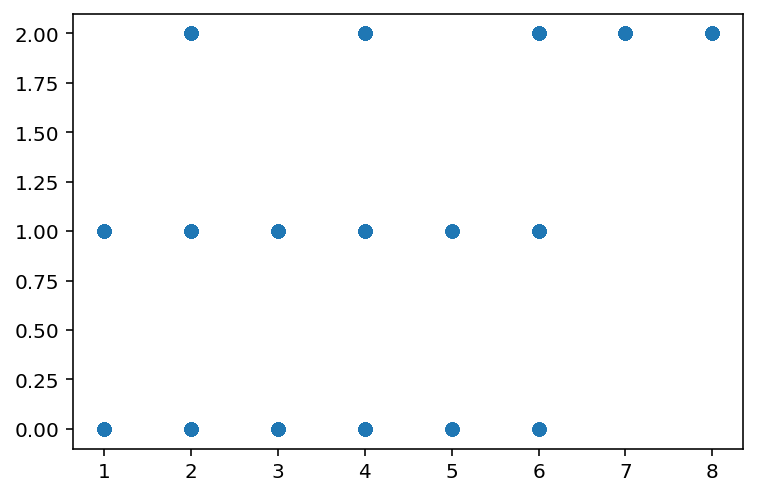




	alcohol_use and Label of Lung Cancer


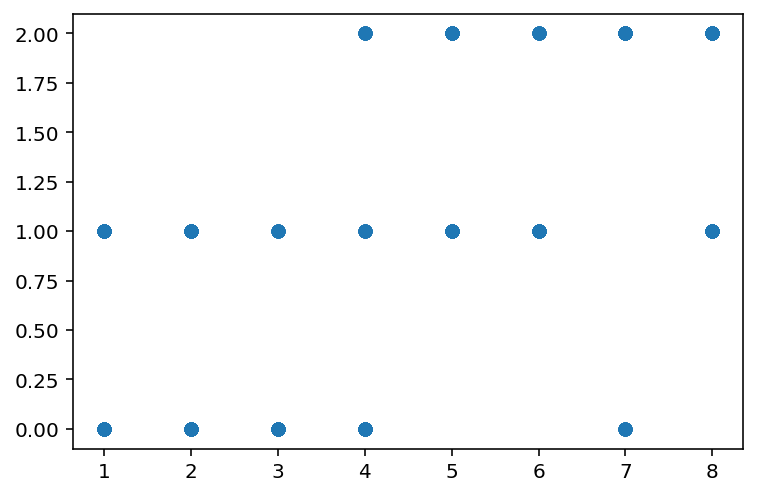

In [34]:

print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['smoking'], df['level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['air_pollution'], df['level'])
plt.show()
print('\n')

print('\n\talcohol_use and Label of Lung Cancer')
plt.scatter(df['alcohol_use'], df['level'])
plt.show()
print('\n')


In [36]:
# Animated Scatter Plot

px.scatter(data_frame=df,
          x='age',
           y='smoking',
           size='air_pollution',
           color='level',
           title='Age, Smoking and Air Polution',
           labels={
               'age': 'Age',
               'air_pollution': 'Air Polution',
               'level': 'Lung Cancer Level',
               'smoking': 'Smoking',
               'gender': 'Gender'
           },
           log_x=True,
           range_y=[-5,15],
           hover_name='level',
           animation_frame='gender',
           height=800,
           size_max=100
          )

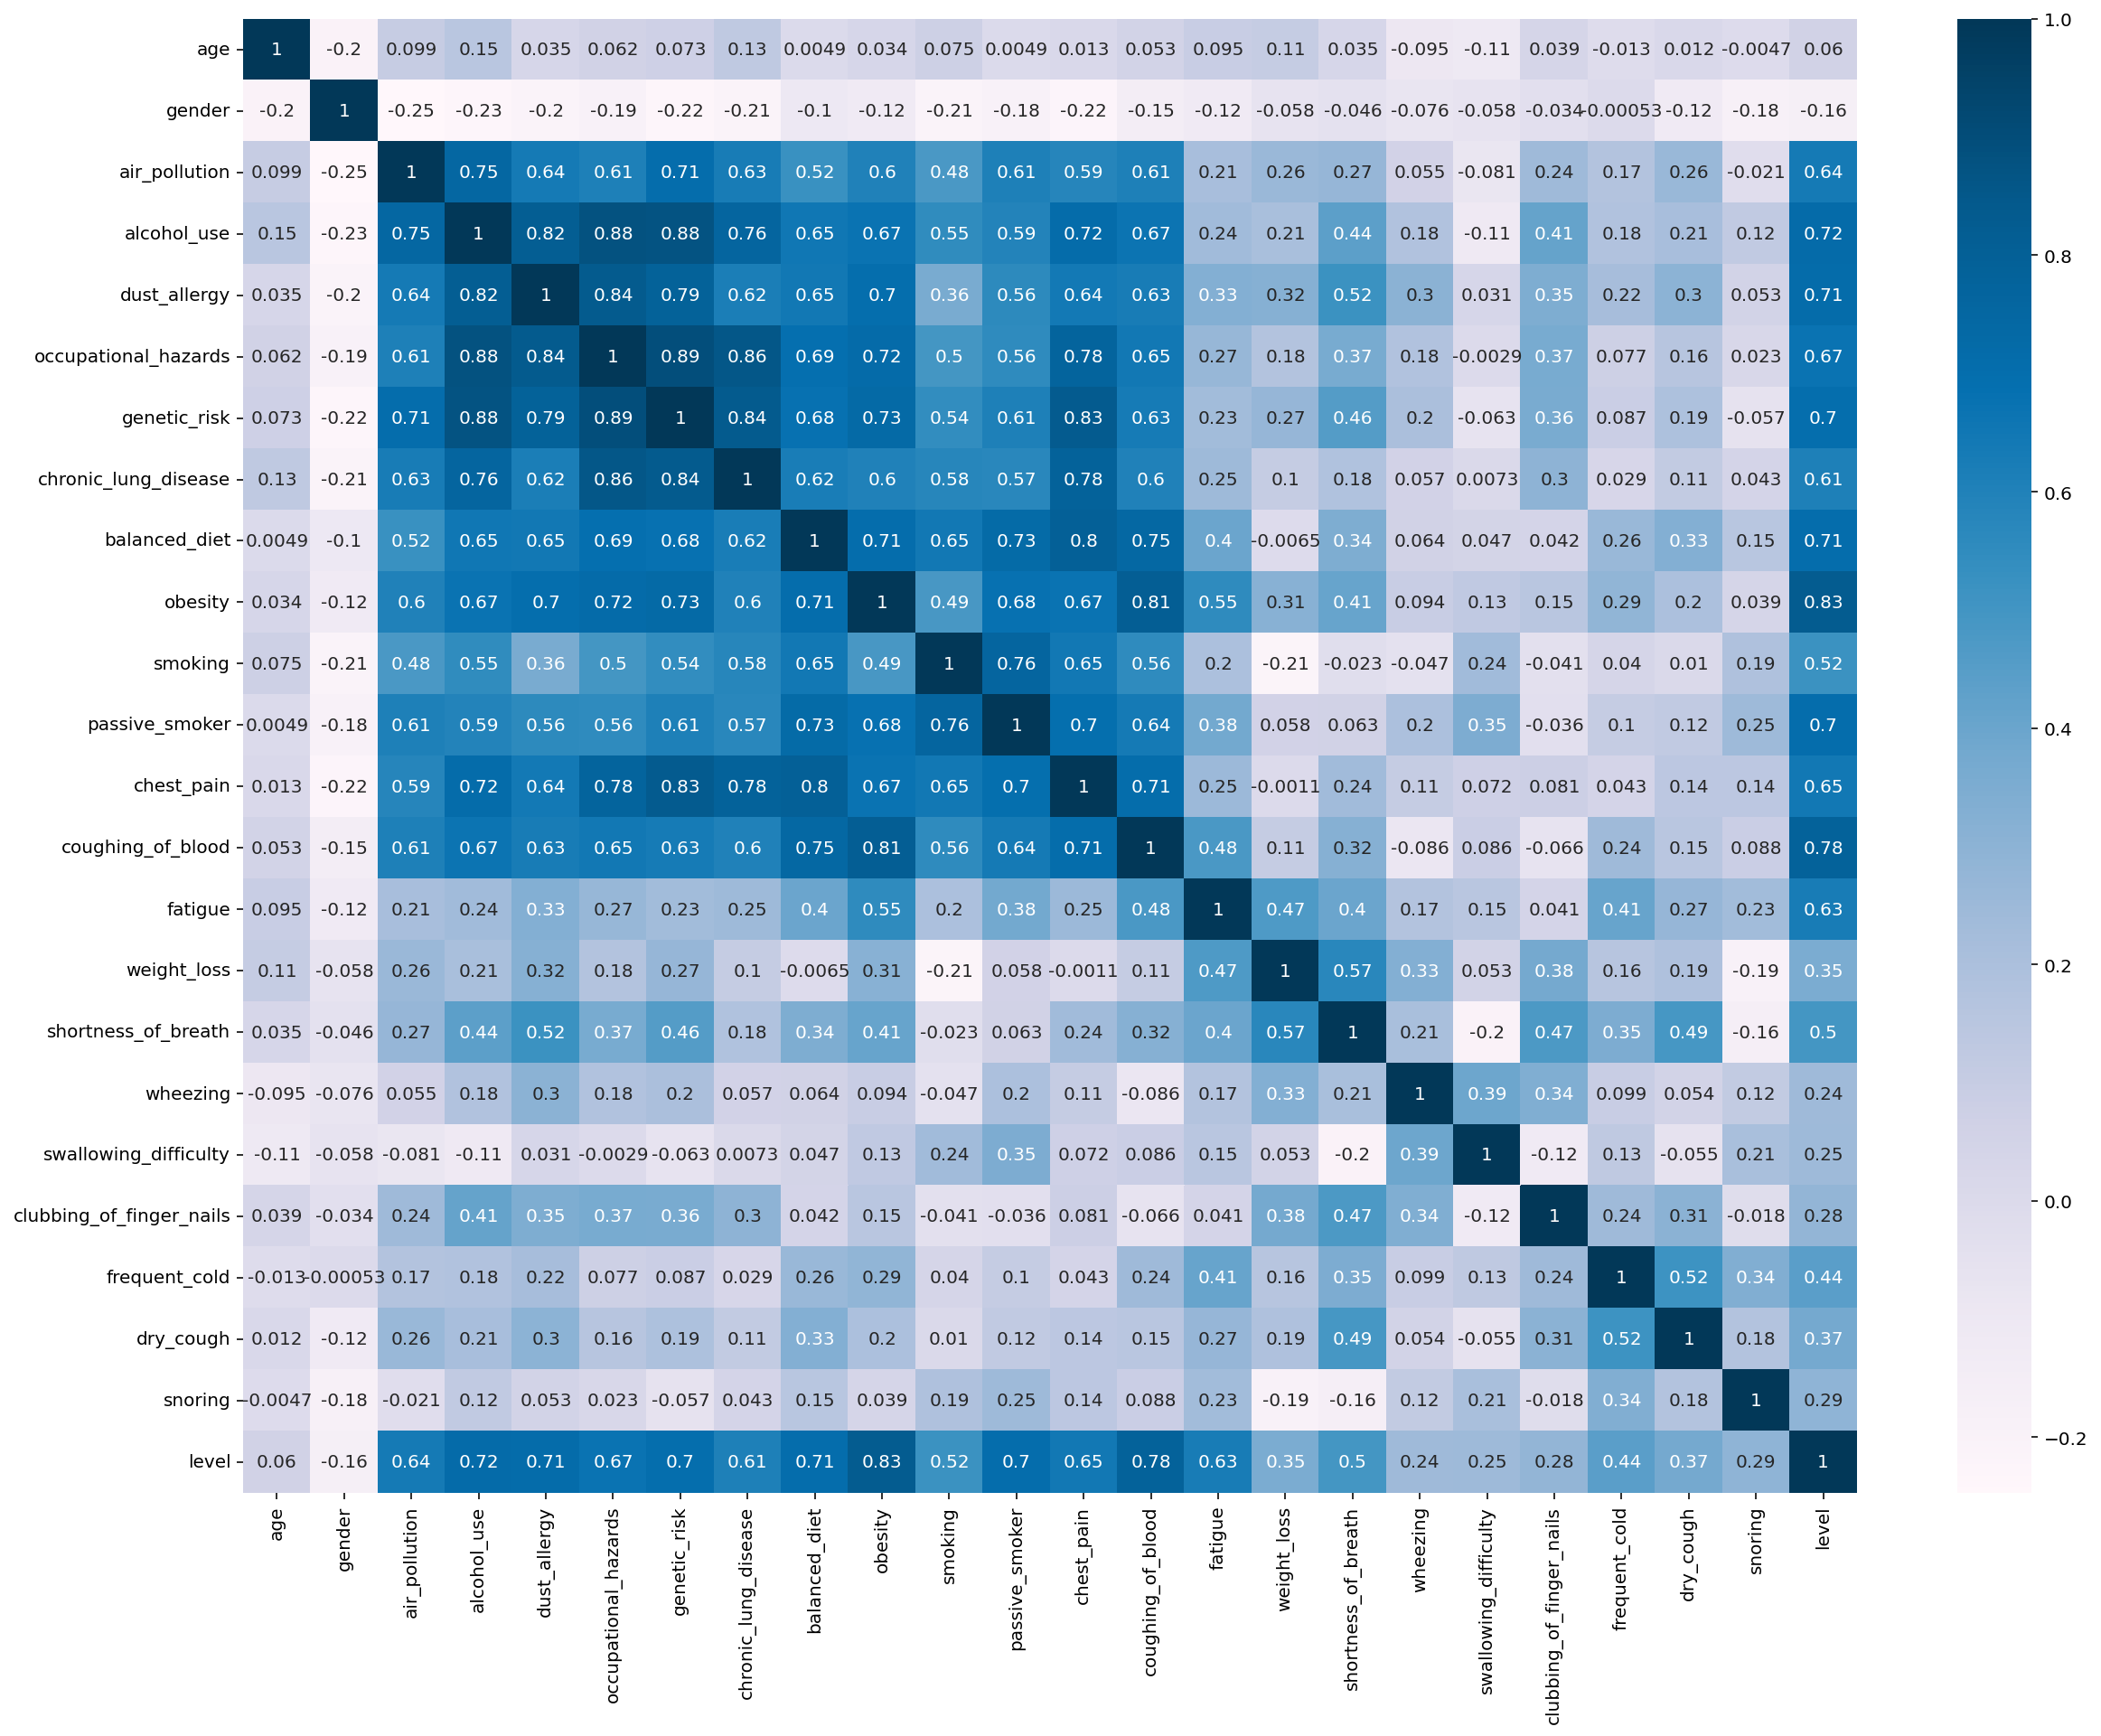

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [39]:

X = df.drop(columns='level')
y = df.level

display(X.head(), y[:10])

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)


Train Shape

X train shape:  (700, 23)
Y train shape:  (700,)


Test Shape

X test shape:  (300, 23)
Y test shape:  (300,)


In [41]:
# Data Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)


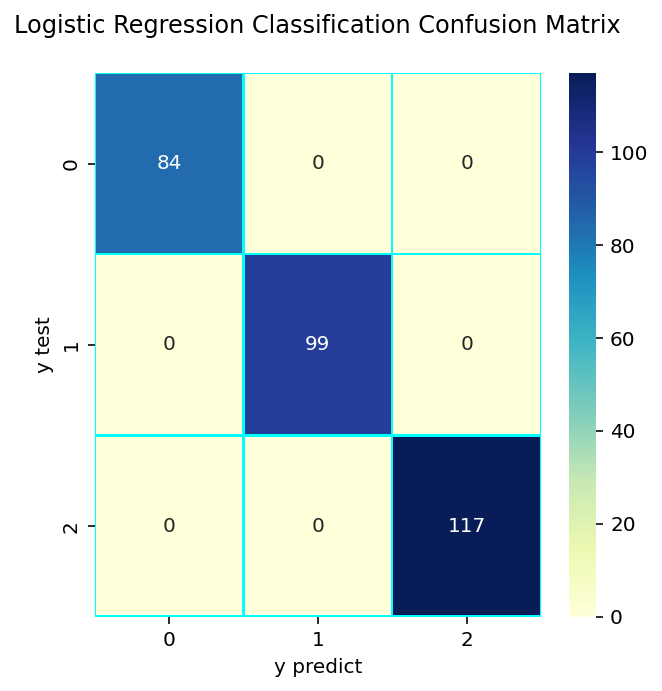

In [43]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()

In [44]:
# Test Score

print('\n')
score_logreg = logreg.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_logreg)
print('\n')



Logistic Regression Score =  1.0




In [45]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))
print('\n')



Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [46]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train_scaled, y_train)

y_predict2 = nbcla.predict(X_test_scaled)

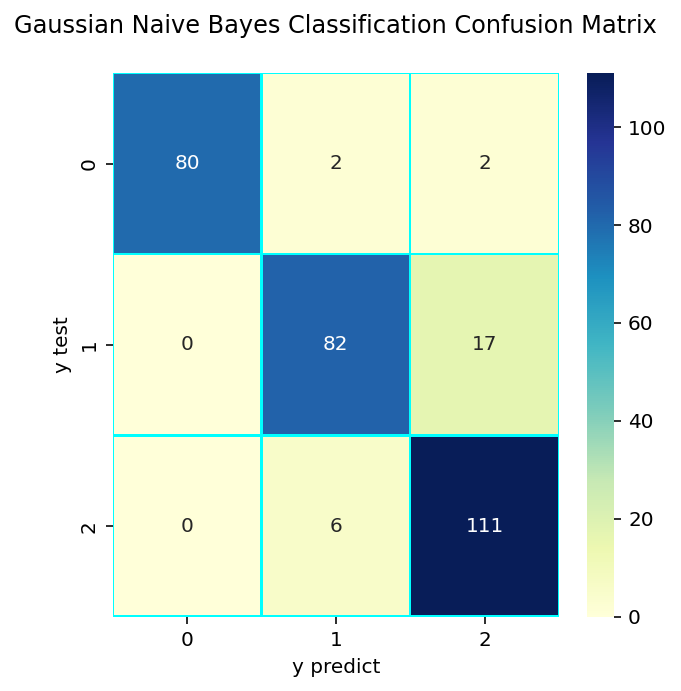

In [47]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [48]:
score_nbcla = nbcla.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)

Gaussian Naive Bayes Score =  0.91


In [49]:
print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [50]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train_scaled, y_train)

y_predict3 = dtcla.predict(X_test_scaled)

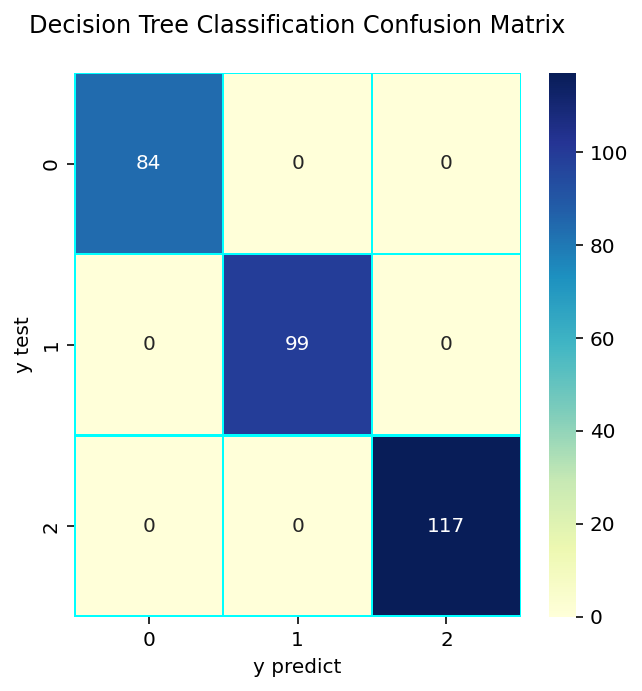

In [51]:
dtcla_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [52]:
# Test Score
print('\n')
score_dtcla = dtcla.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_dtcla)
print('\n')



Decision Tree Score =  1.0




In [53]:
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [54]:
# All Test Scores

print('\n')
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ']) 
print(Testscores)
print('\n')



Logistic Regression Score =     1.00
Naive Bayes Score =             0.91
Decision Tree Score =           1.00
dtype: float64




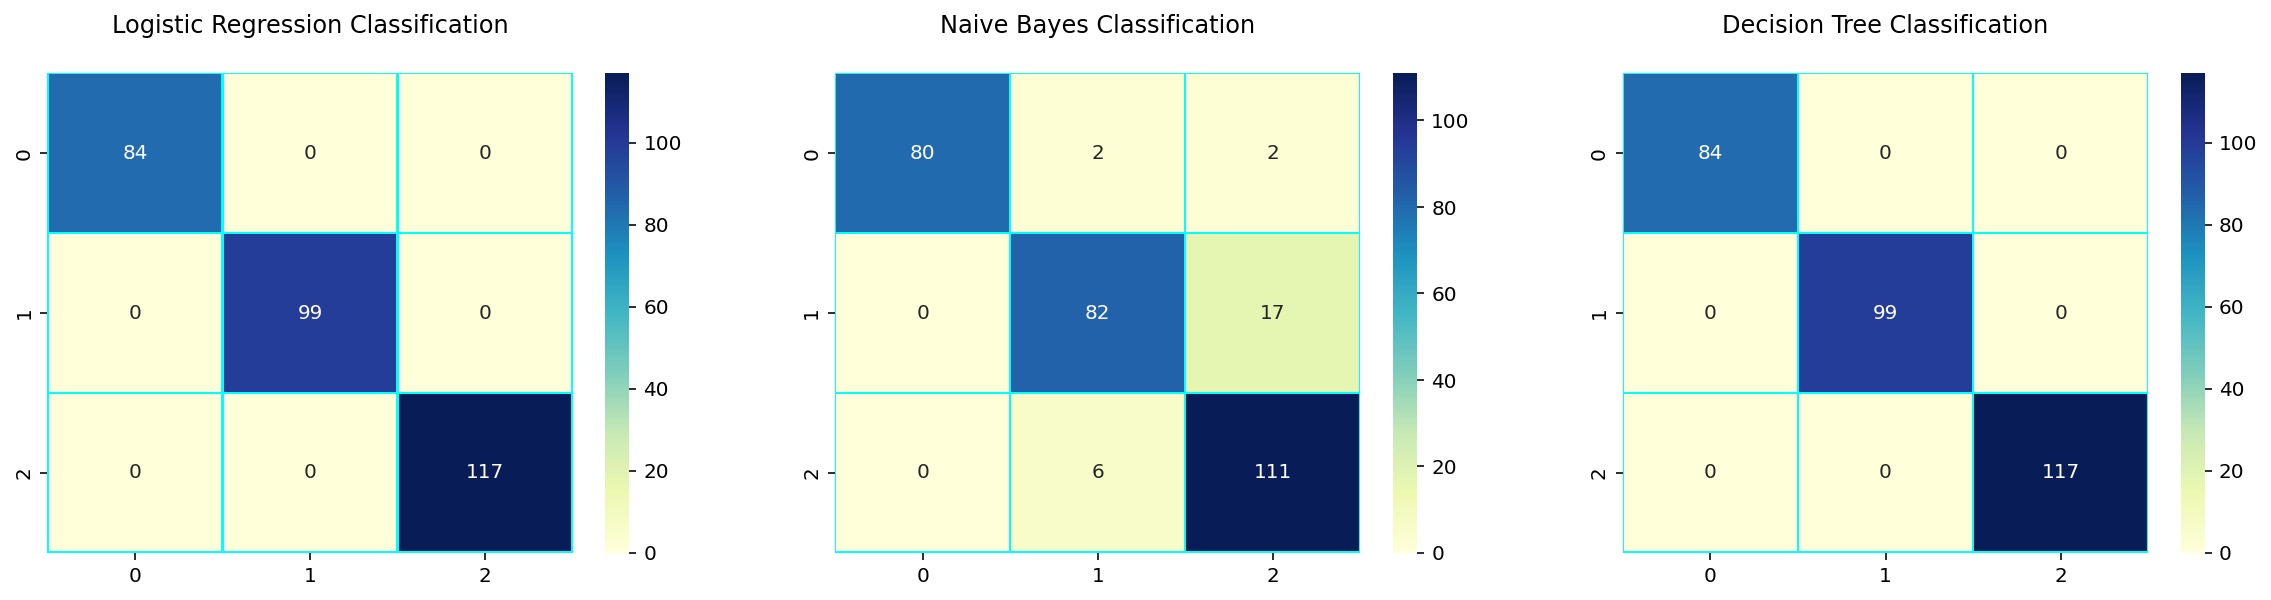

In [55]:
# All Confusion Matrices

print('\n')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)

plt.show()
print('\n')

In [56]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree']
y = [score_logreg, score_nbcla, score_dtcla]

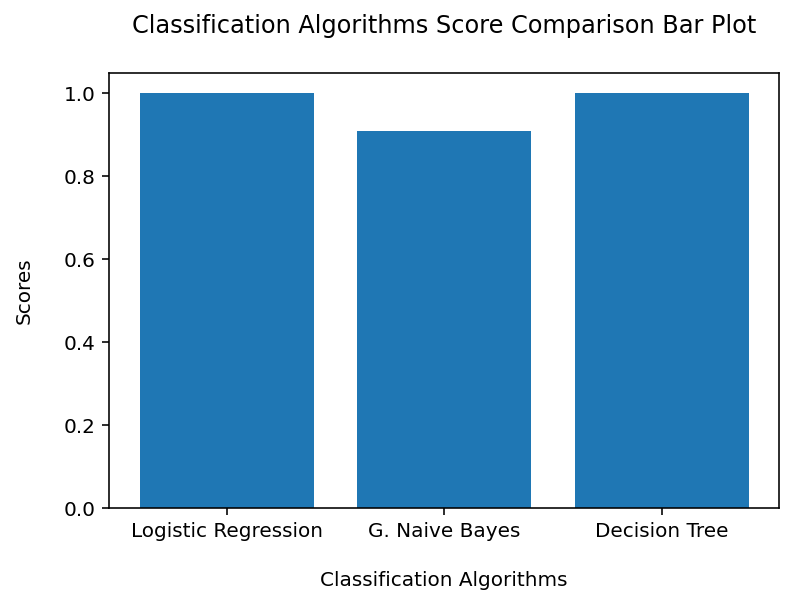

In [57]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()
print('\n')

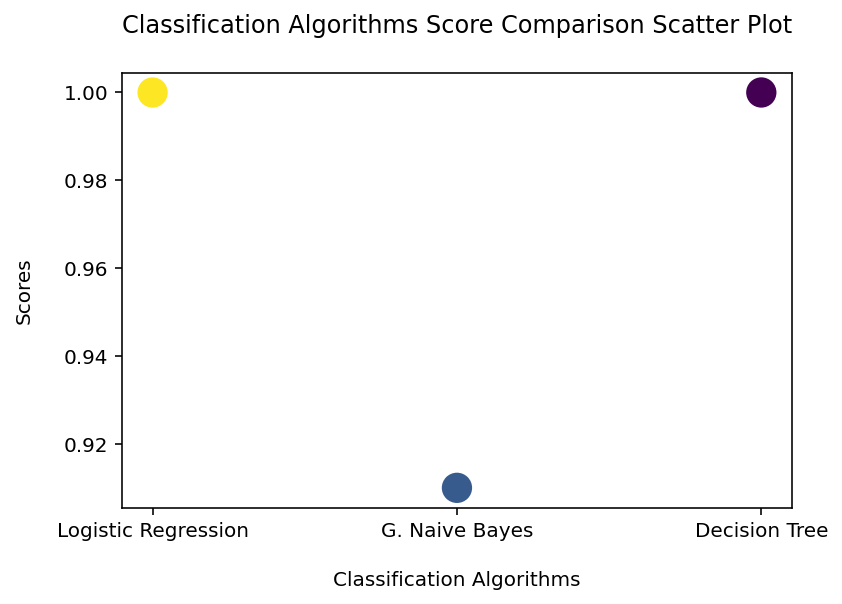

In [58]:
# Scatter Plot

print('\n')
colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()
print('\n')

In [59]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_logreg == score_nbcla and score_logreg == score_dtcla and score_nbcla == score_dtcla:
    al = True

if score_logreg == score_nbcla:
    ln = True
    
if score_logreg == score_dtcla:
    ld = True
    
if score_nbcla == score_dtcla:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_logreg > score_nbcla and score_logreg > score_dtcla:
        print('\nLogistic Regression Performs Better\n')
    if score_nbcla > score_logreg and score_nbcla > score_dtcla:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dtcla > score_logreg and score_dtcla > score_nbcla:
        print('\nDecision Tree Performs Better\n')


Logistic Regression and Decision Tree Performs Better

